In [1]:
import re
from bs4 import BeautifulSoup
import string
from nltk import word_tokenize
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import pymorphy2
from wordcloud import WordCloud
from matplotlib import pyplot as plt
import numpy as np

# Подготовка данных

In [2]:
def getAuthors(id):
    authors = []
    with open("out_imt/" + str(id) + "_5.xml", 'r') as f:
        data = f.read()

    xml = BeautifulSoup(data, 'xml')
    items = xml.findChild('authors').findChildren("item")
    for it in items:
        authors.append(it.text.strip())

    return authors

In [3]:
def getKeywords(id):
    keywords = []
    with open("out_imt/" + str(id) + "_5.xml", 'r') as f:
        data = f.read()

    xml = BeautifulSoup(data, 'xml')
    items = xml.findChild('keywords').findChildren("item")
    for it in items:
        keywords.append(it.text.strip())

    return keywords

In [4]:
def getTitle(id):
    title = None
    with open("out_imt/" + str(id) + "_5.xml", 'r') as f:
        data = f.read()

    xml = BeautifulSoup(data, 'xml')
    item = xml.findChild('title')

    title = item.text.strip()

    return title

In [5]:
def getUDK(id):
    udks = []
    with open("out_imt/" + str(id) + "_5.xml", 'r') as f:
        data = f.read()

    xml = BeautifulSoup(data, 'xml')
    items = xml.findChild('udkitems').findChildren("item")
    for it in items:
        udks.append(it.text.strip())

    return udks

In [6]:
def getAnnotation(id):
    annotation = None
    with open("out_imt/" + str(id) + "_5.xml", 'r') as f:
        data = f.read()

    xml = BeautifulSoup(data, 'xml')
    item = xml.findChild('annotation')

    annotation = item.text.strip()

    return annotation

In [7]:
def getText(id):
    text = None
    with open("out_imt/" + str(id) + "_5.xml", 'r') as f:
        data = f.read()

    xml = BeautifulSoup(data, 'xml')
    item = xml.findChild('text')

    return re.sub(r'[^А-Яа-я+\s\.]',"" , item.text.strip())

In [8]:
def getTheme(id):
    annotation = None
    with open("out_imt/" + str(id) + "_5.xml", 'r') as f:
        data = f.read()

    xml = BeautifulSoup(data, 'xml')
    item = xml.findChild('theme')

    theme = item.text.strip()

    return theme

# TF-IDF

In [9]:
texts_cleared = []
for i in range(1, 428):
    with open("out_imt/" + str(i) + "_tfidf.txt", 'r') as f:
        data = f.read()
    texts_cleared.append(data.split(","))
texts_cleared

[['системный',
  'исследование',
  'энергетика',
  'институт',
  'система',
  'энергетика',
  'ла',
  'мелентьев',
  'исэм',
  'ран',
  'являться',
  'лидер',
  'область',
  'системный',
  'исследование',
  'энергетика',
  'россия',
  'основной',
  'научный',
  'направль',
  'ния',
  'исэм',
  'ран',
  'теория',
  'создание',
  'энергетический',
  'система',
  'комплекс',
  'установка',
  'управление',
  'научный',
  'основа',
  'механизм',
  'реализация',
  'энергетический',
  'политика',
  'россия',
  'регион',
  'рамка',
  'направление',
  'выполняться',
  'исследование',
  'система',
  'энергетика',
  'элек',
  'троэнергетический',
  'газо',
  'нефте',
  'нефтепродукто',
  'снабжение',
  'теплосиловой',
  'энергетический',
  'безопасность',
  'россия',
  'региональный',
  'проблема',
  'энергетика',
  'взаимосвязь',
  'энергетика',
  'экономика',
  'перспективный',
  'энергетический',
  'источник',
  'система',
  'исследование',
  'область',
  'кладный',
  'математика',
  'информат

In [10]:
russian_stopwords = stopwords.words("russian")
russian_stopwords.extend('который')

russian_stopwords_ = "г, или, но, дабы, затем, потом, лишь только, он, мы, его, вы, вам, вас, ее, что, мочь, который, их, все, они, я, весь, мне, меня, таким, для, на, по, со, из, от, до, без, над, под, за, при, после, во, же, то, бы, всего, итого, даже, да, нет, ой, ого, эх, браво, здравствуйте, спасибо, извините, скажем, может, допустим, честно говоря, например, на самом деле, однако, вообще, в, общем, вероятно, очень, минимально, максимально, абсолютно, огромный, предельно, сильно, слабо, самый, сайт, давать, всегда, однако, и, а, но, да, если, что, когда, потому, что, так, как, как, будто, который, любой, вследствие, того, что, с, тех, пор, как, в, то, время, как, для, того, чтобы, ни, то, ли, но, зато, от, и, к, the, который, самый, каждый, некоторый, который, аннотация"

russian_stopwords  = set(russian_stopwords + russian_stopwords_.split(', '))

In [11]:
def clear_text(t):
    t = str(t).lower()
    t = t.replace('\n', ' ')
    t = t.replace('.', '. ')
    t = t.replace(',', ', ')
    t = t.replace('xa0', ' ')

    return ' '.join(re.findall('[a-zа-яё]+', t))

In [12]:
def getTextFilteredTokensNormF(j):
    spec_chars = string.punctuation + '«»\t—…’–'

    txt = getText(j)
    # txt = getAnnotation(j)

    txt = txt.lower()

    txt = "".join([ch for ch in txt if ch not in spec_chars])
    txt = re.sub('\n', ' ', txt)

    txt = "".join([ch for ch in txt if ch not in string.digits])

    text_tokens = word_tokenize(txt)
    # text_tokens = [t.strip() for t in text_tokens if t not in russian_stopwords]

    morph = pymorphy2.MorphAnalyzer()
    f_tokens = []

    for t in text_tokens:
        p = morph.parse(str(t))[0]
        if p.normal_form not in russian_stopwords:
            f_tokens.append(p.normal_form)


    return f_tokens

In [13]:
texts_for_tfidf = []
for i in range(1, 428):
    texts_for_tfidf.append(getTextFilteredTokensNormF(i))

In [14]:
texts_for_tfidf = [clear_text(t) for t in texts_for_tfidf]

# Векторизация текстов на основе TF-IDF

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X = vectorizer.fit_transform(texts_for_tfidf)
# print(texts_cleared[0])
vars (X)

{'_shape': (427, 405499),
 'maxprint': 50,
 'indices': array([ 87970, 103118, 396916, ..., 273086, 302729, 104667], dtype=int32),
 'indptr': array([     0,   2248,   4259,   7025,   9851,  12446,  15222,  17001,
         18606,  20441,  22061,  23778,  25106,  26908,  29142,  30602,
         32476,  34033,  35828,  37631,  38811,  40127,  41727,  43839,
         46131,  46876,  49785,  51310,  53505,  55526,  56501,  57960,
         59336,  60834,  62087,  65153,  65882,  69552,  71153,  72898,
         74595,  77334,  78262,  80013,  81907,  83838,  85329,  86258,
         87701,  89037,  90345,  91398,  93081,  94335,  96007,  97292,
        100534, 101933, 103165, 105029, 106817, 108061, 109581, 111575,
        112546, 115379, 117290, 119722, 121456, 122742, 124104, 125810,
        127010, 128193, 129997, 131726, 133938, 135689, 137708, 139230,
        141538, 143458, 144928, 146967, 148427, 150438, 151592, 156472,
        159287, 161916, 163370, 164749, 166003, 167232, 168795, 1695

In [16]:
doc_num = 2

# Получение списка ключевых слов и их значения TF-IDF для первого документа
feature_names = vectorizer.get_feature_names_out()
tfidf_scores = X.toarray()[doc_num]


# Сортировка слов по значениям TF-IDF
sorted_keywords = [word for _, word in sorted(zip(tfidf_scores, feature_names), reverse=True)]

print("Ключевые слова:", sorted_keywords[:20])
print("Ключевые слова из статьи:", getKeywords(doc_num + 1))


Ключевые слова: ['устойчивость', 'природный', 'угроза', 'энергетический', 'риск', 'экологический', 'качество жизнь', 'жизнь', 'риск природный', 'экологический зона', 'природный угроза', 'оценка риск', 'природный техногенный', 'энергетический безопасность', 'безопасность', 'байкальский', 'население', 'энергетический экологический', 'природный территория', 'устойчивость энергетический']
Ключевые слова из статьи: ['устойчивость энергетических и социальных систем', 'природные и техногенные угрозы', 'оценка рисков', 'интеллектуальные информационные технологии', 'когнитивное и вероятностное моделирование']


In [17]:
# for i in range(0, 427):
#     tfidf_scores = X.toarray()[i]
#
#     # Сортировка слов по значениям TF-IDF
#     sorted_keywords = [word for _, word in sorted(zip(tfidf_scores, feature_names), reverse=True)]
#
#     print("----------- i = " + str(i) + " -------------")
#     print("Ключевые слова:", sorted_keywords[:20])
#     print("Ключевые слова из статьи:", getKeywords(i + 1))

In [18]:
print(getAuthors(124 + 1))
print(getTitle(124 + 1))

tfidf_scores = X.toarray()[124]
sorted_keywords = [word for _, word in sorted(zip(tfidf_scores, feature_names), reverse=True)]

print("Ключевые слова:", sorted_keywords[:20])
print("Ключевые слова из статьи:", getKeywords(125))

print("----------------")
print(getAuthors(163 + 1))
print(getTitle(163 + 1))

tfidf_scores = X.toarray()[163]
sorted_keywords = [word for _, word in sorted(zip(tfidf_scores, feature_names), reverse=True)]

print("Ключевые слова:", sorted_keywords[:20])
print("Ключевые слова из статьи:", getKeywords(164))

['Тучкова Наталия Павловна', 'Атаева Ольга Муратовна']
ПОДХОДЫ К ИЗВЛЕЧЕНИЮ ЗНАНИЙ В НАУЧНЫХ ПРЕДМЕТНЫХ ОБЛАСТЯХ0
Ключевые слова: ['тезаурус', 'предметный', 'предметный область', 'знание', 'извлечение знание', 'область', 'извлечение', 'публикация', 'данные', 'интеллект', 'искусственный', 'метрика', 'искусственный интеллект', 'наукометрический', 'онтология тезаурус', 'цифровой', 'структурирование', 'научный', 'сохранение извлечение', 'наукометрический показатель']
Ключевые слова из статьи: ['структурирование данных', 'тезаурус предметной области', 'метрики', 'тезаурус оду']
----------------
['Коробова Людмила Анатольевна', 'Матыцина Ирина Александровна', 'Калугин Виталий Александрович', 'Калугин Виталий Александрович']
Экспериментальный стенд для обнаружения дефектов воздухопроводов
Ключевые слова: ['дефект', 'воздухопровод', 'стенд', 'сигнал', 'микрофон', 'матрица', 'экспериментальный стенд', 'металл', 'шум', 'трубопровод', 'магистраль', 'датчик', 'ковариационный матрица', 'ковариацион

In [19]:
tfidf_scores

array([0., 0., 0., ..., 0., 0., 0.])

In [20]:
from gensim.models import Phrases
from gensim.corpora import Dictionary

In [21]:
docs = texts_cleared
bigram = Phrases(docs, min_count=10)
for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

In [22]:
dictionary = Dictionary(docs)
dictionary.filter_extremes(no_below=10, no_above=0.3)
# vars(dictionary)

In [23]:
corpus = [dictionary.doc2bow(doc) for doc in docs]

In [24]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 4495
Number of documents: 427


In [25]:
X

<427x405499 sparse matrix of type '<class 'numpy.float64'>'
	with 792457 stored elements in Compressed Sparse Row format>

# Train LDA model.

In [26]:
from gensim.models import LdaModel

In [27]:
chunksize = 4000
passes = 20
iterations = 400
eval_every = None

In [28]:
import gensim

In [29]:
id2word = dictionary.id2token

In [30]:
def getTopicKeywords(k, alltopics):
    kw = []
    for tp in alltopics[k]:
        if isinstance(tp, list):
            for key in  tp:
                kw.append(key[1])
    return kw

In [31]:
id2word = dictionary.id2token

In [32]:
def norm_vect(vect):

    v = np.array([t for t in vect])
    return v / np.linalg.norm(v)

In [33]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

In [34]:
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors


In [35]:

from gensim.models.coherencemodel import CoherenceModel

import pyLDAvis
import pyLDAvis.gensim_models


In [36]:
def compute_coherence_values(dictionary,corpus,texts,limit,start=2,step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        # model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics,random_state=100,
                                              # chunksize=200,passes=10,per_word_topics=True,id2word=id2word)

        model = gensim.models.ldamulticore.LdaMulticore(
            corpus=corpus,
            # id2word=dictionary,
            id2word=dictionary,
            chunksize=chunksize,
            eta='auto',
            iterations=iterations,
            num_topics=num_topics,
            passes=passes,
            eval_every=eval_every,
            workers=16)



        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


In [37]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary,corpus=corpus,
                                                      texts=texts_cleared, start=2, limit=54, step=1)

In [38]:
len(coherence_values)

52

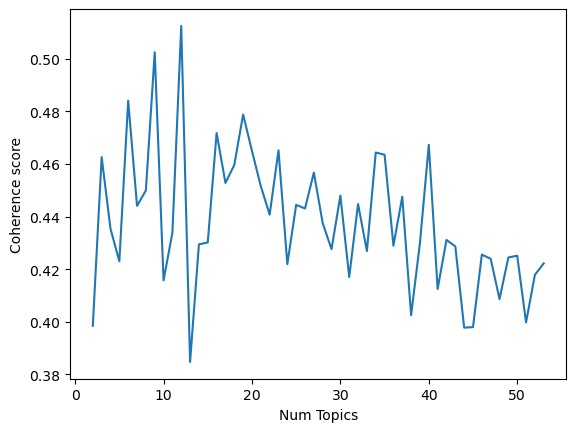

In [39]:
# Show Coherence graph
limit=54; start=2; step=1;
x= range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
# plt.legend(("coherence_values"), loc='best')
plt.show()

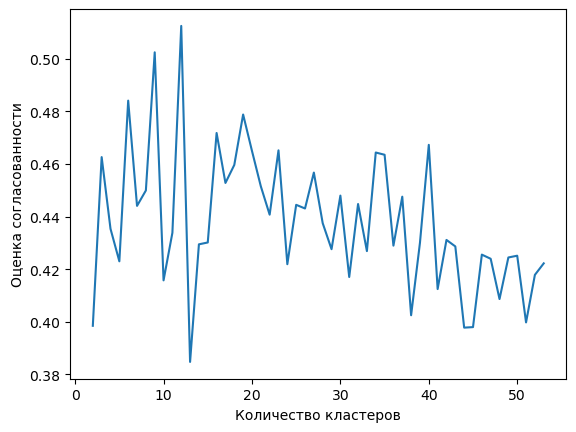

In [40]:
# Show Coherence graph
limit=54; start=2; step=1;
x= range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Количество кластеров")
plt.ylabel("Оценка согласованности")
# plt.legend(("coherence_values"), loc='best')
plt.show()

In [41]:
ntopics = 53
m53 = model_list[ntopics - 2]
m53.num_topics

53

In [42]:
# generate document-topic distributions
for i, doc in enumerate(corpus):
    doc_topics = m53.get_document_topics(doc)
    print(f"Document {i}: {doc_topics}")

Document 0: [(8, 0.75967413), (25, 0.04228691), (50, 0.19702859)]
Document 1: [(3, 0.27598947), (8, 0.048890356), (11, 0.08727815), (24, 0.3096632), (27, 0.15206401), (28, 0.06706424), (49, 0.057988934)]
Document 2: [(3, 0.16764134), (21, 0.27966863), (24, 0.0832325), (30, 0.053064972), (32, 0.020554245), (39, 0.04555904), (45, 0.013681955), (50, 0.30081964), (52, 0.012206801)]
Document 3: [(3, 0.012790989), (27, 0.422598), (36, 0.5254037), (38, 0.029483594)]
Document 4: [(15, 0.1510538), (16, 0.04239366), (19, 0.07354007), (20, 0.12764159), (26, 0.012024179), (27, 0.2071172), (40, 0.03395756), (41, 0.011952163), (46, 0.14786397), (48, 0.021518897), (49, 0.1602222)]
Document 5: [(0, 0.024516353), (1, 0.19741687), (39, 0.7771799)]
Document 6: [(4, 0.07509774), (12, 0.17548348), (16, 0.1340752), (18, 0.034624632), (19, 0.026965808), (20, 0.19721988), (21, 0.03518559), (26, 0.056341425), (46, 0.05754327), (47, 0.106279545), (49, 0.04344716), (51, 0.056524877)]
Document 7: [(20, 0.9661629)

In [43]:
for i, doc in enumerate(corpus):
    doc_topics = m53.get_document_topics(doc)
    # topics_ = [t1 for t1 in doc_topics if t1 > 0.5  -1]
    print(f"Document {i}: {doc_topics}")

Document 0: [(8, 0.7596763), (25, 0.042282682), (50, 0.19703062)]
Document 1: [(3, 0.27598932), (8, 0.0488929), (11, 0.08728372), (24, 0.30965465), (27, 0.15205811), (28, 0.06706601), (49, 0.057993643)]
Document 2: [(3, 0.1676416), (21, 0.27966845), (24, 0.08323019), (30, 0.053062297), (32, 0.020554505), (39, 0.045561478), (45, 0.013674137), (50, 0.3008218), (52, 0.012206684)]
Document 3: [(3, 0.012792977), (27, 0.42259693), (36, 0.5254029), (38, 0.029483574)]
Document 4: [(15, 0.15104698), (16, 0.042389765), (19, 0.07352123), (20, 0.12762912), (26, 0.012022193), (27, 0.20710436), (40, 0.033936255), (41, 0.012037917), (46, 0.14785564), (48, 0.021536652), (49, 0.16020396)]
Document 5: [(0, 0.024519745), (1, 0.1974148), (39, 0.7771786)]
Document 6: [(4, 0.07509712), (12, 0.1754857), (16, 0.13407314), (18, 0.034604598), (19, 0.026955098), (20, 0.19721426), (21, 0.035183523), (26, 0.056353558), (46, 0.057534207), (47, 0.106277466), (49, 0.04349842), (51, 0.05651147)]
Document 7: [(20, 0.96

In [44]:
# generate document-topic distributions
for i, doc in enumerate(corpus):
    if i in [125, 1]:
        print(getAuthors(i))
        print(getTitle(i))
        doc_topics = m53.get_document_topics(doc)
        print(f"Document {i}: {doc_topics}")

['Массель Людмила Васильевна', 'Массель Алексей Геннадьевич', 'Копайгородский Алексей Николаевич']
ЭВОЛЮЦИЯ ТЕХНОЛОГИЙ ИССЛЕДОВАНИЙ ЭНЕРГЕТИКИ И ПРИМЕНЕНИЯ ИХ РЕЗУЛЬТАТОВ ОТ МАТЕМАТИЧЕСКИХ МОДЕЛЕЙ И КОМПЬЮТЕРНЫХ ПРОГРАММ К ЦИФРОВЫМ ДВОЙНИКАМ И ЦИФРОВЫМ ОБРАЗАМ
Document 1: [(3, 0.27598935), (8, 0.048891537), (11, 0.08728081), (24, 0.30965924), (27, 0.15206128), (28, 0.067065105), (49, 0.057990972)]
['Тучкова Наталия Павловна', 'Атаева Ольга Муратовна']
ПОДХОДЫ К ИЗВЛЕЧЕНИЮ ЗНАНИЙ В НАУЧНЫХ ПРЕДМЕТНЫХ ОБЛАСТЯХ0
Document 125: [(22, 0.22620809), (26, 0.7663607)]


In [45]:
ntopics = 15
m15 = model_list[ntopics - 2]
m15.num_topics

15

In [46]:
# generate document-topic distributions
for i, doc in enumerate(corpus):
    doc_topics = m15.get_document_topics(doc)
    print(f"Document {i}: {doc_topics}")

Document 0: [(0, 0.060899016), (7, 0.7147383), (8, 0.14897296), (12, 0.07460421)]
Document 1: [(0, 0.15769352), (1, 0.052868824), (7, 0.08514625), (12, 0.6351159), (14, 0.06835999)]
Document 2: [(1, 0.022036718), (6, 0.041745808), (7, 0.5219957), (9, 0.048219223), (11, 0.2108248), (12, 0.154717)]
Document 3: [(0, 0.0724442), (3, 0.039813843), (5, 0.02321907), (6, 0.119358554), (7, 0.70515126), (9, 0.03246159)]
Document 4: [(3, 0.07361855), (7, 0.49793932), (8, 0.11471496), (10, 0.0992119), (14, 0.21374594)]
Document 5: [(2, 0.39259073), (6, 0.42108813), (8, 0.16495459), (11, 0.02067703)]
Document 6: [(0, 0.026404066), (3, 0.43881786), (7, 0.13827108), (8, 0.35356352), (10, 0.020584226), (11, 0.021419534)]
Document 7: [(4, 0.9985038)]
Document 8: [(2, 0.16636263), (5, 0.047948346), (6, 0.6213921), (7, 0.114427775), (8, 0.048734803)]
Document 9: [(0, 0.7692013), (2, 0.2243526)]
Document 10: [(3, 0.10103242), (8, 0.2327153), (13, 0.10905481), (14, 0.5560757)]
Document 11: [(1, 0.22816983)

In [47]:
len(model_list)

52

In [48]:
for t in range(52, 53):
    m_t = model_list[t - 2]
    print("Topics number", m_t.num_topics)
    for i, doc in enumerate(corpus):
        doc_topics = m_t.get_document_topics(doc)
        print(f"Document {i}: {doc_topics}")
    break

Topics number 52
Document 0: [(8, 0.18631274), (29, 0.8126575)]
Document 1: [(1, 0.013295806), (9, 0.6621415), (16, 0.1314654), (26, 0.0108314175), (37, 0.12928544), (40, 0.046639476)]
Document 2: [(0, 0.20007038), (5, 0.24570219), (8, 0.29846385), (19, 0.014547192), (23, 0.20231327), (29, 0.0367243)]
Document 3: [(12, 0.034636717), (23, 0.06359688), (36, 0.10450702), (42, 0.09431111), (44, 0.6933217)]
Document 4: [(4, 0.16303815), (16, 0.028614985), (33, 0.45354408), (46, 0.34585205)]
Document 5: [(0, 0.26245275), (1, 0.05670571), (5, 0.021645645), (22, 0.1778161), (23, 0.071181305), (24, 0.14763121), (27, 0.23228663), (36, 0.029484997)]
Document 6: [(3, 0.01827057), (10, 0.046722047), (14, 0.010108559), (15, 0.04552527), (18, 0.12487151), (31, 0.076950744), (32, 0.04782445), (35, 0.05474472), (36, 0.011107014), (43, 0.18590958), (44, 0.2831172), (46, 0.05289664), (50, 0.03481386)]
Document 7: [(4, 0.046645425), (9, 0.24828495), (15, 0.08956814), (21, 0.034681153), (28, 0.02402833), (

# K MEANS

In [49]:
import numpy as np

import torch

from transformers import AutoTokenizer, AutoModel

from sentence_transformers import SentenceTransformer

/home/oli/miniconda3/envs/NLPExesices/lib/python3.10/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [50]:
model = SentenceTransformer('mlsa-iai-msu-lab/sci-rus-tiny')

/home/oli/miniconda3/envs/NLPExesices/lib/python3.10/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/home/oli/miniconda3/envs/NLPExesices/lib/python3.10/site-packages/torch/cuda/__init__.py:628: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/home/oli/miniconda3/envs/NLPExesices/lib/python3.10/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [51]:
embeddings_list = []
texts = []
for i in range(1, 428):
    txt = getTitle(i) + '</s>' + getAnnotation(i)
    texts.append(txt)
    emb = model.encode([txt])
    embeddings_list.append(emb[0])

embeddings_list = np.asarray(embeddings_list)

/home/oli/miniconda3/envs/NLPExesices/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/oli/miniconda3/envs/NLPExesices/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/oli/miniconda3/envs/NLPExesices/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/oli/miniconda3/envs/NLPExesices/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: Fut

51
[313.7180480957031, 299.8836975097656, 289.4885559082031, 282.2707214355469, 274.56146240234375, 268.8619384765625, 264.7987060546875, 259.0077209472656, 255.15846252441406, 251.76885986328125, 246.70285034179688, 242.92604064941406, 240.0857696533203, 236.9978790283203, 236.47593688964844, 232.53585815429688, 229.73036193847656, 230.08154296875, 226.53919982910156, 224.54307556152344, 223.49960327148438, 220.97413635253906, 219.3681182861328, 217.4330596923828, 215.46133422851562, 213.74386596679688, 211.65367126464844, 210.35653686523438, 207.79432678222656, 208.06944274902344, 206.51995849609375, 205.7533721923828, 202.728759765625, 201.90402221679688, 198.7233123779297, 198.04568481445312, 198.2397003173828, 196.26422119140625, 194.84251403808594, 193.9089813232422, 193.61378479003906, 191.16969299316406, 189.1506805419922, 189.30157470703125, 188.33987426757812, 188.15562438964844, 186.60906982421875, 185.1197967529297, 181.72964477539062, 183.6910400390625, 181.9509735107422]


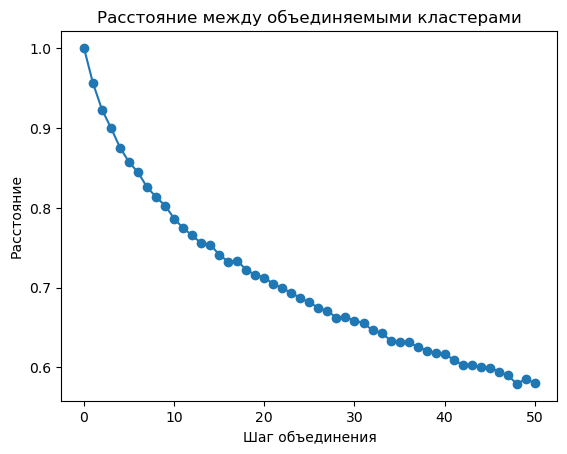

In [52]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity

def determine_k(embeddings):
    k_min = 10
    # clusters = [x for x in range(2, k_min * 11)]
    clusters = [x for x in range(2, 53)]
    metrics = []

    for i in clusters:
        metrics.append((KMeans(n_clusters=i).fit(embeddings)).inertia_)
    k, score, clusters_num = elbow(k_min, clusters, metrics)

    print(len(metrics))
    print(metrics)





    # idxs = range(0, len(metrics))
    idxs = range(0, 51)
    plt.plot(idxs, [x/max(metrics) for x in metrics][:51], marker='o')
    plt.title('Расстояние между объединяемыми кластерами')
    plt.xlabel('Шаг объединения')
    plt.ylabel('Расстояние')



    return k

def elbow(k_min, clusters, metrics):
    score = []
    clusters_num = []

    for i in range(k_min, clusters[-3], 5):
        y1 = np.array(metrics)[:i + 1]
        y2 = np.array(metrics)[i:]

        df1 = pd.DataFrame({'x': clusters[:i + 1], 'y': y1})
        df2 = pd.DataFrame({'x': clusters[i:], 'y': y2})

        reg1 = LinearRegression().fit(np.asarray(df1.x).reshape(-1, 1), df1.y)
        reg2 = LinearRegression().fit(np.asarray(df2.x).reshape(-1, 1), df2.y)

        y1_pred = reg1.predict(np.asarray(df1.x).reshape(-1, 1))
        y2_pred = reg2.predict(np.asarray(df2.x).reshape(-1, 1))

        score.append(mean_squared_error(y1, y1_pred) + mean_squared_error(y2, y2_pred))
        clusters_num.append(i)

    return np.argmin(score) + k_min, score, clusters_num

k_opt = determine_k(embeddings_list)

In [53]:
k_opt

10

In [54]:
from sklearn.metrics.pairwise import euclidean_distances

kmeans = KMeans(n_clusters = k_opt, random_state = 42).fit(embeddings_list)
kmeans_labels = kmeans.labels_

data = pd.DataFrame()
data['text'] = texts
data['label'] = kmeans_labels
data['embedding'] = list(embeddings_list)

kmeans_centers = kmeans.cluster_centers_
top_texts_list = []
for i in range (0, k_opt):
    cluster = data[data['label'] == i]
    embeddings = list(cluster['embedding'])
    texts = list(cluster['text'])
    distances = [euclidean_distances(kmeans_centers[0].reshape(1, -1), e.reshape(1, -1))[0][0] for e in embeddings]
    scores = list(zip(texts, distances))
    top_3 = sorted(scores, key=lambda x: x[1])
    top_texts = list(zip(*top_3))[0]
    top_texts_list.append(top_texts)

/home/oli/miniconda3/envs/NLPExesices/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [55]:
top_texts_list[0]

('УЧЁТ ВОЗОБНОВЛЯЕМЫХ ИСТОЧНИКОВ ЭНЕРГИИ ПРИ МОДЕЛИРОВАНИИ ЭНЕРГЕТИЧЕСКИХ БАЛАНСОВ</s>Аннотация . Ускоряющееся развитие  нетрадиционной возобновляемой энергетики обусл овливает необходимость внес ения корректив как в состав моделей энергетических балансов, где ранее они не были отражены в полной мере, так и в методику прогнозирования отдельных балансовых показателей.  Описывается модификация  созданны х в ИЭОПП СО РАН мультиметодны х модел ей среднесрочног о прогнозирования региональных топливно -энергетических балансов . Обсуждаются сложности пополнения информационных баз моделей и возможные пути их преодоления. Приводится результат использования модели по оценке сбалансированности планового за дания  по вводу  станций на возобновляемых источниках энергии.',
 'ПРОГРАММНЫЙ КОМПЛЕКС ДЛЯ ЭКОЛОГО МАТЕМАТИЧЕСКОГО МОДЕЛИРОВАНИЯ ПРОИЗВ ОДСТВА СЕЛЬСКОХОЗЯЙС ТВЕННОЙ ПРОДУКЦИИ</s>Аннотация.  Описан программный комплекс для эколого -математического моделирования производства сельскохозяйственной

In [56]:

from matplotlib.pyplot import figure, show
from bokeh.io import output_notebook
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors


data[id]=np.arange(1,1+len(data))
data=data.reindex(columns=['id', 'label','text','embedding'])


# Get topic weights
topic_weights = []
print(data.iloc[1])
for row_list in  data:
    print( row_list)
# #     # topic_weights.append([w for 'labels' in row_list])
# # # # Array of topic weights
# # arr = pd.DataFrame(topic_weights).fillna(0).values
# # #
# # # # Keep the well separated points (optional)
# # arr = arr[np.amax(arr, axis=1)>0.3]
# # # # Dominant topic number in each doc
# # topic_num = np.argmax(arr, axis=1)
# # # # tSNE Dimension Reduction
# # tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
# # tsne_lda = tsne_model.fit_transform(arr)
# # # # Plot the Topic Clusters using Bokeh
# # output_notebook()
# # n_topics = topic_num
# # # print(n_topics)
# # mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
# # plot = figure(title="Clustering of Topics".format(n_topics), width=450, height=350)
# # plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[n_topics])
# # show(plot)

id                                                         NaN
label                                                        1
text         АНАЛИЗ ПЕРСПЕКТИВ ПРИМЕНЕНИЯ ЦИФРОВЫХ ТЕХНОЛОГ...
embedding    [0.027907994, -0.058617942, 0.014311354, -0.02...
Name: 1, dtype: object
id
label
text
embedding


In [57]:
data.head()

id  label                                               text  \
0 NaN      9  ЭВОЛЮЦИЯ ТЕХНОЛОГИЙ ИССЛЕДОВАНИЙ ЭНЕРГЕТИКИ И ...   
1 NaN      1  АНАЛИЗ ПЕРСПЕКТИВ ПРИМЕНЕНИЯ ЦИФРОВЫХ ТЕХНОЛОГ...   
2 NaN      1  ОЦЕНКА РИСКОВ ПРИРОДНЫХ И ТЕХНОГЕННЫХ УГРОЗ УС...   
3 NaN      9  СТРАТИФИЦИРОВАННАЯ МОДЕЛЬ УПРАВЛЕНИЯ ГОСУДАРСТ...   
4 NaN      2  ВИЗУАЛЬНАЯ АНАЛИТИКА И КОГНИТИВНЫЕ МЕТОДЫ ДЛЯ ...   

                                           embedding  
0  [0.0008791493, 0.105896346, -0.09406612, -0.06...  
1  [0.027907994, -0.058617942, 0.014311354, -0.02...  
2  [0.045995697, 0.0065312344, -0.06366947, -0.05...  
3  [0.032923076, 0.09314069, -0.048355874, -0.044...  
4  [0.07564531, 0.11077881, -0.032338344, 0.11043...

In [58]:
embeddings_list[:5]

array([[ 0.00087915,  0.10589635, -0.09406612, ...,  0.05358749,
        -0.0787548 ,  0.04515382],
       [ 0.02790799, -0.05861794,  0.01431135, ..., -0.04777925,
         0.06371456,  0.01275086],
       [ 0.0459957 ,  0.00653123, -0.06366947, ...,  0.09858301,
        -0.04747615, -0.03415855],
       [ 0.03292308,  0.09314069, -0.04835587, ..., -0.00964463,
        -0.05455051, -0.01279192],
       [ 0.07564531,  0.11077881, -0.03233834, ...,  0.06502272,
        -0.07218648, -0.02552309]], dtype=float32)

/home/oli/miniconda3/envs/NLPExesices/lib/python3.10/site-packages/yellowbrick/style/colors.py:35: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
/home/oli/miniconda3/envs/NLPExesices/lib/python3.10/site-packages/setuptools/_distutils/version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/home/oli/miniconda3/envs/NLPExesices/lib/python3.10/site-packages/yellowbrick/style/rcmod.py:31: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
/home/oli/miniconda3/envs/NLPExesices/lib/python3.10/site-packages/setuptools/_distutils/version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


1 2 0 0
2 0 1 -2
2 1 1 -1
2 2 1 0
3 0 2 -2
3 1 2 -1
3 2 2 0
4 0 3 -2
4 1 3 -1
4 2 3 0
5 0 4 -2
5 1 4 -1


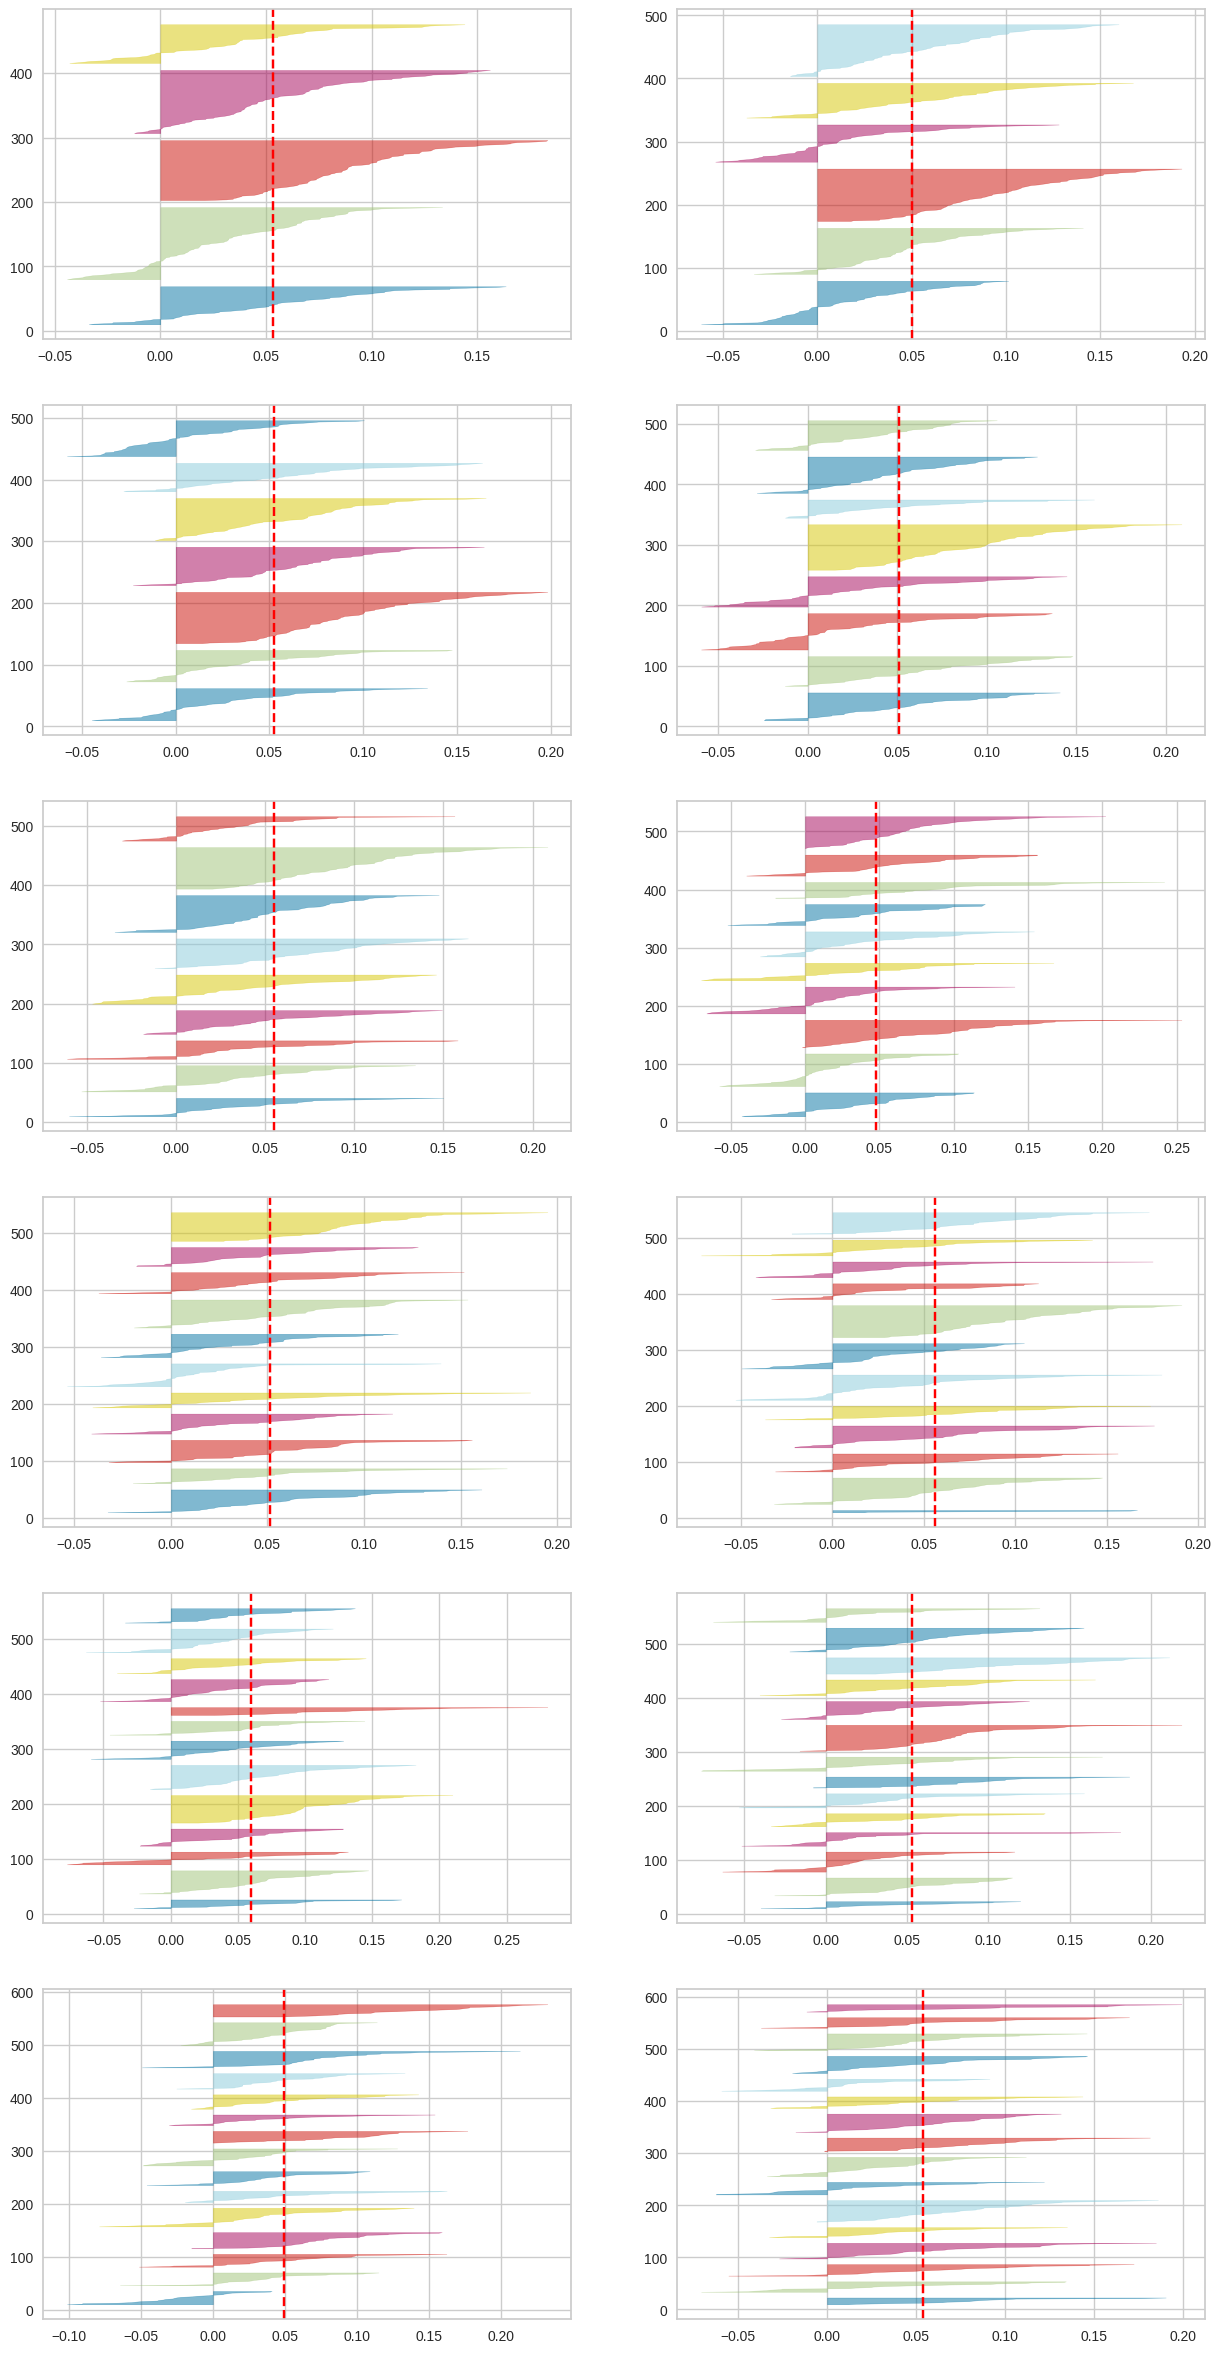

In [59]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(6, 2, figsize=(15,30))
count = 0;
for i in [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16 ]:
    '''
    Create KMeans instance for different number of clusters
    '''
    # km = kmeans
    km = KMeans(n_clusters = i, random_state = 42, n_init=10)
    q, mod = divmod(i, 3)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    print(q, mod, q - 1, mod - 2 )
    if i == 5:
        visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[0][0])
        visualizer.fit(embeddings_list)
    elif i == 6:
        visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[0][1])
        visualizer.fit(embeddings_list)
    elif i == 7:
        visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[1][0])
        visualizer.fit(embeddings_list)
    elif i == 8:
        visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[1][1])
        visualizer.fit(embeddings_list)
    elif i == 9:
        visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[2][0])
        visualizer.fit(embeddings_list)
    elif i == 10:
        visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[2][1])
        visualizer.fit(embeddings_list)
    elif i == 11:
        visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[3][0])
        visualizer.fit(embeddings_list)
    elif i == 12:
        visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[3][1])
        visualizer.fit(embeddings_list)
    elif i == 13:
        visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[4][0])
        visualizer.fit(embeddings_list)
    elif i == 14:
        visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[4][1])
        visualizer.fit(embeddings_list)
    elif i == 15:
        visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[5][0])
        visualizer.fit(embeddings_list)
    elif i == 16:
        visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[5][1])
        visualizer.fit(embeddings_list)

In [60]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

In [61]:
len(model_list)

52

In [62]:
for m in model_list:

    topic_weights = []
    for i, row_list in enumerate(m[corpus]):
        # print(i, row_list)
        topic_weights.append([w for i, w in row_list])
    # # Array of topic weights
    arr = pd.DataFrame(topic_weights).fillna(0).values
    #
    # # Keep the well separated points (optional)
    arr = arr[np.amax(arr, axis=1) > 0.3]
    # # Dominant topic number in each doc
    topic_num = np.argmax(arr, axis=1)
    # # tSNE Dimension Reduction
    tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
    tsne_lda = tsne_model.fit_transform(arr)
    # # Plot the Topic Clusters using Bokeh
    output_notebook()
    n_topics = topic_num
    # print(n_topics)
    mycolors = np.array([color for name, color in mcolors.XKCD_COLORS.items()])
    plot = figure(title="Clustering of Topics".format(n_topics), width=450, height=350)
    plot.scatter(x=tsne_lda[:, 0], y=tsne_lda[:, 1], color=mycolors[n_topics])

    # plt.subplot(6,4,i+1)
    # plt.plot(plot)
    show(plot)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 427 samples in 0.001s...
[t-SNE] Computed neighbors for 427 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 427 / 427
[t-SNE] Mean sigma: 0.000181
[t-SNE] KL divergence after 250 iterations with early exaggeration: 44.163353
[t-SNE] KL divergence after 1000 iterations: 0.124697


Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 427 samples in 0.000s...
[t-SNE] Computed neighbors for 427 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 427 / 427
[t-SNE] Mean sigma: 0.000255
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.516518
[t-SNE] KL divergence after 1000 iterations: 0.173161


Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 427 samples in 0.001s...
[t-SNE] Computed neighbors for 427 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 427 / 427
[t-SNE] Mean sigma: 0.000485
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.445660
[t-SNE] KL divergence after 1000 iterations: 0.203456


Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 426 samples in 0.001s...
[t-SNE] Computed neighbors for 426 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 426 / 426
[t-SNE] Mean sigma: 0.001229
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.978165
[t-SNE] KL divergence after 1000 iterations: 0.259201


Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 427 samples in 0.000s...
[t-SNE] Computed neighbors for 427 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 427 / 427
[t-SNE] Mean sigma: 0.000623
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.427471
[t-SNE] KL divergence after 1000 iterations: 0.269542


Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 423 samples in 0.001s...
[t-SNE] Computed neighbors for 423 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 423 / 423
[t-SNE] Mean sigma: 0.001157
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.702724
[t-SNE] KL divergence after 1000 iterations: 0.277483


Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 426 samples in 0.001s...
[t-SNE] Computed neighbors for 426 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 426 / 426
[t-SNE] Mean sigma: 0.002323
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.433495
[t-SNE] KL divergence after 1000 iterations: 0.347552


Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 418 samples in 0.001s...
[t-SNE] Computed neighbors for 418 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 418 / 418
[t-SNE] Mean sigma: 0.002089
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.643787
[t-SNE] KL divergence after 1000 iterations: 0.315707


Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 422 samples in 0.001s...
[t-SNE] Computed neighbors for 422 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 422 / 422
[t-SNE] Mean sigma: 0.002367
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.889473
[t-SNE] KL divergence after 1000 iterations: 0.326179


Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 422 samples in 0.001s...
[t-SNE] Computed neighbors for 422 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 422 / 422
[t-SNE] Mean sigma: 0.005203
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.321999
[t-SNE] KL divergence after 1000 iterations: 0.350775


Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 420 samples in 0.001s...
[t-SNE] Computed neighbors for 420 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 420 / 420
[t-SNE] Mean sigma: 0.001359
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.546562
[t-SNE] KL divergence after 1000 iterations: 0.362555


Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 418 samples in 0.001s...
[t-SNE] Computed neighbors for 418 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 418 / 418
[t-SNE] Mean sigma: 0.001140
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.298073
[t-SNE] KL divergence after 1000 iterations: 0.354376


Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 418 samples in 0.001s...
[t-SNE] Computed neighbors for 418 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 418 / 418
[t-SNE] Mean sigma: 0.060795
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.616291
[t-SNE] KL divergence after 1000 iterations: 0.364881


Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 417 samples in 0.001s...
[t-SNE] Computed neighbors for 417 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 417 / 417
[t-SNE] Mean sigma: 0.034484
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.026623
[t-SNE] KL divergence after 1000 iterations: 0.368042


Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 408 samples in 0.001s...
[t-SNE] Computed neighbors for 408 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 408 / 408
[t-SNE] Mean sigma: 0.004152
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.603153
[t-SNE] KL divergence after 1000 iterations: 0.374108


Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 419 samples in 0.000s...
[t-SNE] Computed neighbors for 419 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 419 / 419
[t-SNE] Mean sigma: 0.011796
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.186787
[t-SNE] KL divergence after 1000 iterations: 0.389871


Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 409 samples in 0.001s...
[t-SNE] Computed neighbors for 409 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 409 / 409
[t-SNE] Mean sigma: 0.001282
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.930737
[t-SNE] KL divergence after 1000 iterations: 0.362759


Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 414 samples in 0.001s...
[t-SNE] Computed neighbors for 414 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 414 / 414
[t-SNE] Mean sigma: 0.001856
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.052162
[t-SNE] KL divergence after 1000 iterations: 0.353942


Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 409 samples in 0.001s...
[t-SNE] Computed neighbors for 409 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 409 / 409
[t-SNE] Mean sigma: 0.002236
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.036594
[t-SNE] KL divergence after 1000 iterations: 0.394251


Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 407 samples in 0.001s...
[t-SNE] Computed neighbors for 407 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 407 / 407
[t-SNE] Mean sigma: 0.001547
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.454098
[t-SNE] KL divergence after 1000 iterations: 0.375527


Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 411 samples in 0.001s...
[t-SNE] Computed neighbors for 411 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 411 / 411
[t-SNE] Mean sigma: 0.001315
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.692211
[t-SNE] KL divergence after 1000 iterations: 0.351505


Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 403 samples in 0.001s...
[t-SNE] Computed neighbors for 403 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 403 / 403
[t-SNE] Mean sigma: 0.001725
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.816132
[t-SNE] KL divergence after 1000 iterations: 0.358444


Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 404 samples in 0.001s...
[t-SNE] Computed neighbors for 404 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 404 / 404
[t-SNE] Mean sigma: 0.001957
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.018513
[t-SNE] KL divergence after 1000 iterations: 0.369278


Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 410 samples in 0.001s...
[t-SNE] Computed neighbors for 410 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 410 / 410
[t-SNE] Mean sigma: 0.001205
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.029182
[t-SNE] KL divergence after 1000 iterations: 0.361358


Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 411 samples in 0.001s...
[t-SNE] Computed neighbors for 411 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 411 / 411
[t-SNE] Mean sigma: 0.003569
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.421810
[t-SNE] KL divergence after 1000 iterations: 0.353400


Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 405 samples in 0.001s...
[t-SNE] Computed neighbors for 405 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 405 / 405
[t-SNE] Mean sigma: 0.001793
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.754585
[t-SNE] KL divergence after 1000 iterations: 0.351546


Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 401 samples in 0.001s...
[t-SNE] Computed neighbors for 401 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 401 / 401
[t-SNE] Mean sigma: 0.001141
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.289070
[t-SNE] KL divergence after 1000 iterations: 0.338800


Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 397 samples in 0.001s...
[t-SNE] Computed neighbors for 397 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 397 / 397
[t-SNE] Mean sigma: 0.001259
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.103374
[t-SNE] KL divergence after 1000 iterations: 0.313353


Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 408 samples in 0.001s...
[t-SNE] Computed neighbors for 408 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 408 / 408
[t-SNE] Mean sigma: 0.001666
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.572197
[t-SNE] KL divergence after 1000 iterations: 0.366110


Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 404 samples in 0.001s...
[t-SNE] Computed neighbors for 404 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 404 / 404
[t-SNE] Mean sigma: 0.000847
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.913971
[t-SNE] KL divergence after 1000 iterations: 0.351056


Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 401 samples in 0.001s...
[t-SNE] Computed neighbors for 401 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 401 / 401
[t-SNE] Mean sigma: 0.001462
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.495583
[t-SNE] KL divergence after 1000 iterations: 0.331415


Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.001s...
[t-SNE] Computed neighbors for 400 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 0.001337
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.023312
[t-SNE] KL divergence after 1000 iterations: 0.321701


Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 404 samples in 0.001s...
[t-SNE] Computed neighbors for 404 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 404 / 404
[t-SNE] Mean sigma: 0.000941
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.690964
[t-SNE] KL divergence after 1000 iterations: 0.323682


Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 399 samples in 0.001s...
[t-SNE] Computed neighbors for 399 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 399 / 399
[t-SNE] Mean sigma: 0.000980
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.378540
[t-SNE] KL divergence after 1000 iterations: 0.322203


Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 402 samples in 0.001s...
[t-SNE] Computed neighbors for 402 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 402 / 402
[t-SNE] Mean sigma: 0.001411
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.651222
[t-SNE] KL divergence after 1000 iterations: 0.311657


Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 395 samples in 0.001s...
[t-SNE] Computed neighbors for 395 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 395 / 395
[t-SNE] Mean sigma: 0.000714
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.512733
[t-SNE] KL divergence after 850 iterations: 0.311231


Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 403 samples in 0.001s...
[t-SNE] Computed neighbors for 403 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 403 / 403
[t-SNE] Mean sigma: 0.001330
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.092434
[t-SNE] KL divergence after 1000 iterations: 0.319274


Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 401 samples in 0.001s...
[t-SNE] Computed neighbors for 401 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 401 / 401
[t-SNE] Mean sigma: 0.000863
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.469475
[t-SNE] KL divergence after 1000 iterations: 0.299875


Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.001s...
[t-SNE] Computed neighbors for 400 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 0.000903
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.033062
[t-SNE] KL divergence after 1000 iterations: 0.338147


Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 401 samples in 0.001s...
[t-SNE] Computed neighbors for 401 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 401 / 401
[t-SNE] Mean sigma: 0.000744
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.157421
[t-SNE] KL divergence after 1000 iterations: 0.320869


Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 402 samples in 0.001s...
[t-SNE] Computed neighbors for 402 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 402 / 402
[t-SNE] Mean sigma: 0.000712
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.548611
[t-SNE] KL divergence after 1000 iterations: 0.316891


Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.000s...
[t-SNE] Computed neighbors for 400 samples in 0.017s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 0.000688
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.395477
[t-SNE] KL divergence after 1000 iterations: 0.302119


Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 398 samples in 0.001s...
[t-SNE] Computed neighbors for 398 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 398 / 398
[t-SNE] Mean sigma: 0.000620
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.031384
[t-SNE] KL divergence after 1000 iterations: 0.310394


Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 405 samples in 0.001s...
[t-SNE] Computed neighbors for 405 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 405 / 405
[t-SNE] Mean sigma: 0.000677
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.320786
[t-SNE] KL divergence after 1000 iterations: 0.286090


Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 411 samples in 0.001s...
[t-SNE] Computed neighbors for 411 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 411 / 411
[t-SNE] Mean sigma: 0.000609
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.868412
[t-SNE] KL divergence after 1000 iterations: 0.303520


Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 409 samples in 0.001s...
[t-SNE] Computed neighbors for 409 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 409 / 409
[t-SNE] Mean sigma: 0.000705
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.177700
[t-SNE] KL divergence after 1000 iterations: 0.324297


Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.001s...
[t-SNE] Computed neighbors for 400 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 0.000764
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.817890
[t-SNE] KL divergence after 1000 iterations: 0.305768


Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 413 samples in 0.001s...
[t-SNE] Computed neighbors for 413 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 413 / 413
[t-SNE] Mean sigma: 0.000517
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.299900
[t-SNE] KL divergence after 1000 iterations: 0.281718


Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 404 samples in 0.001s...
[t-SNE] Computed neighbors for 404 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 404 / 404
[t-SNE] Mean sigma: 0.000572
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.250912
[t-SNE] KL divergence after 1000 iterations: 0.296916


Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 404 samples in 0.001s...
[t-SNE] Computed neighbors for 404 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 404 / 404
[t-SNE] Mean sigma: 0.000551
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.829132
[t-SNE] KL divergence after 1000 iterations: 0.298705


Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 393 samples in 0.001s...
[t-SNE] Computed neighbors for 393 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 393 / 393
[t-SNE] Mean sigma: 0.000750
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.475357
[t-SNE] KL divergence after 1000 iterations: 0.302849


Loading BokehJS ...

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 409 samples in 0.001s...
[t-SNE] Computed neighbors for 409 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 409 / 409
[t-SNE] Mean sigma: 0.000474
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.864830
[t-SNE] KL divergence after 1000 iterations: 0.298181


Loading BokehJS ...